In [1]:
import warnings
warnings.filterwarnings('ignore')

## Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [2]:
import keras 
import tensorflow as tf

print('Tensorflow version ',tf.__version__)
print('keras version ',keras.__version__)

Tensorflow version  2.14.0
keras version  2.14.0


## Q2. Load the Wine Quality dataset and explore its dimensions.


In [4]:
import pandas as pd

df=pd.read_csv(r'C:\Users\tanji\Desktop\myPW\assignments\datasets\wine.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [5]:
df.shape

(1599, 12)

It has 1599 datapoints with 11 independent feature and 1 dependent output variable

## Q3. Check for null values, identify categorical variables, and encode them.


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
cat_col=df.select_dtypes(include=['object']).columns.tolist()
num_col=df.select_dtypes(exclude=['object']).columns.tolist()

cat_col, num_col

(['quality'],
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'])

In [8]:
from sklearn.preprocessing import OrdinalEncoder

df['quality'].unique()

encoder=OrdinalEncoder()

df['quality']=encoder.fit_transform(df[['quality']])
df['quality']=df['quality'].astype('int32')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Q4. Separate the features and target variables from the dataset.


In [18]:
x=df.drop('quality', axis=1)
y=df['quality']

## Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.


In [19]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25, random_state=42)

xtrain,xvalid, ytrain,yvalid=train_test_split(x,y,test_size=0.20, random_state=42)

In [20]:
xtrain.shape,xtest.shape,xvalid.shape

((1279, 11), (400, 11), (320, 11))

## Q6. Scale the dataset using an appropriate scaling technique.


In [21]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)
xvalid=scaler.transform(xvalid)

## Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [43]:
import tensorflow as tf

LAYERS=[
    tf.keras.layers.Dense(200, activation='relu', input_shape=xtrain.shape[1:]),
    tf.keras.layers.Dense(70,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]

## Q8. Create a Sequential model in Keras and add the previously designed layers to it.


In [44]:
model=tf.keras.models.Sequential(LAYERS)

In [45]:
model.build(input_shape=(None,11))

## Q9. Print the summary of the model architecture.


In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 200)               2400      
                                                                 
 dense_10 (Dense)            (None, 70)                14070     
                                                                 
 dense_11 (Dense)            (None, 1)                 71        
                                                                 
Total params: 16541 (64.61 KB)
Trainable params: 16541 (64.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.


In [47]:
OPTIMIZER='adam'
LOSS='binary_crossentropy'
METRICS=['accuracy']

## Q11. Compile the model with the specified loss function, optimizer, and metrics.


In [48]:
model.compile(loss=LOSS,
              optimizer=OPTIMIZER,
             metrics=METRICS
             )

## Q12. Fit the model to the training data using appropriate batch size and number of epochs.


In [49]:
EPOCHS=40
BATCH=10

history=model.fit(xtrain, ytrain, epochs=EPOCHS, validation_data=(xvalid,yvalid), batch_size=BATCH)

Epoch 1/40
128/128 [==============================] - 3s 6ms/step - loss: 0.5556 - accuracy: 0.7154 - val_loss: 0.5109 - val_accuracy: 0.7344
Epoch 2/40
128/128 [==============================] - 1s 4ms/step - loss: 0.5071 - accuracy: 0.7608 - val_loss: 0.5047 - val_accuracy: 0.7375
Epoch 3/40
128/128 [==============================] - 1s 5ms/step - loss: 0.4946 - accuracy: 0.7709 - val_loss: 0.5021 - val_accuracy: 0.7156
Epoch 4/40
128/128 [==============================] - 1s 6ms/step - loss: 0.4823 - accuracy: 0.7756 - val_loss: 0.5027 - val_accuracy: 0.7219
Epoch 5/40
128/128 [==============================] - 1s 4ms/step - loss: 0.4713 - accuracy: 0.7780 - val_loss: 0.4915 - val_accuracy: 0.7437
Epoch 6/40
128/128 [==============================] - 1s 7ms/step - loss: 0.4687 - accuracy: 0.7787 - val_loss: 0.4878 - val_accuracy: 0.7469
Epoch 7/40
128/128 [==============================] - 1s 4ms/step - loss: 0.4590 - accuracy: 0.7936 - val_loss: 0.4787 - val_accuracy: 0.7531
Epoch 

## Q13. Obtain the model's parameters (weights and biases).


In [50]:
param=model.get_weights()

for ind,i in enumerate(range(0,len(param),2)):
    print(f"Weights of Layer {ind+1} :\n{param[i]}")
    print(f"Bias of Layer{ind+1} :\n{param[i+1]}")
    print("==========================================================")

Weights of Layer 1 :
[[ 4.8664883e-02  3.4052935e-01 -2.0536034e-01 ... -9.6051507e-02
   2.9222044e-01 -2.3120892e-01]
 [ 9.5430084e-02 -9.8380096e-02 -4.3835748e-02 ...  5.5861007e-02
  -8.3108105e-02  1.8201219e-01]
 [-1.8048190e-04 -3.8856265e-01 -5.5265617e-02 ...  2.3267962e-01
  -2.4402632e-04 -7.9112358e-02]
 ...
 [ 8.5276909e-02 -2.5775179e-01  1.6757353e-01 ...  3.5007771e-02
  -7.5525872e-02  1.1187211e-01]
 [-3.1977522e-01  5.5179335e-02  7.9008020e-02 ...  7.6262929e-02
  -1.0876588e-01 -7.1624346e-02]
 [ 1.8834386e-02  2.3322570e-01 -2.0094307e-01 ... -2.0316847e-02
  -1.5841934e-01  2.0580724e-02]]
Bias of Layer1 :
[-0.13115233 -0.06192419  0.02949423 -0.01548189  0.04182818 -0.07354537
  0.02600428 -0.06753289 -0.01198943 -0.10167671 -0.01086173 -0.01393667
  0.02225651 -0.12278841 -0.1395291   0.03532432 -0.11106676  0.05117275
 -0.08354441 -0.12248166  0.05902319 -0.09887439 -0.10675583 -0.046267
 -0.13918701  0.05404428 -0.18793264  0.02465257 -0.11260179  0.01398756

## Q14. Store the model's training history as a Pandas DataFrame.


In [51]:
df=pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.555589,0.715403,0.510934,0.734375
1,0.507141,0.760751,0.504672,0.737500
2,0.494585,0.770915,0.502065,0.715625
3,0.482250,0.775606,0.502667,0.721875
4,0.471251,0.777952,0.491464,0.743750
5,0.468677,0.778733,0.487835,0.746875
6,0.458997,0.793589,0.478687,0.753125
7,0.449176,0.785770,0.480791,0.756250
8,0.441523,0.789679,0.466512,0.775000
9,0.431806,0.802189,0.481710,0.759375


## Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.


<Axes: >

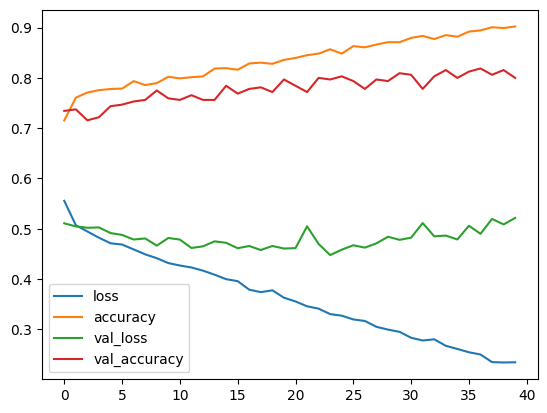

In [52]:
df.plot()

## Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [53]:
evaluation=model.evaluate(xtest, ytest, verbose=2)
evaluation

13/13 - 0s - loss: 0.4525 - accuracy: 0.8300 - 290ms/epoch - 22ms/step


[0.4524878263473511, 0.8299999833106995]

In [55]:
import numpy as np

ypred=model.predict(xtest)

ypred=np.where(ypred>0.5,1,0)

13/13 [==============================] - 0s 3ms/step


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [57]:
confusion_matrix(ytest,ypred)

array([[152,  26],
       [ 42, 180]], dtype=int64)

In [58]:
accuracy_score(ytest,ypred)

0.83

In [59]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       178
           1       0.87      0.81      0.84       222

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

